# Objetivo:

Verificar quais as carecterísticas dos Fundos de Investimento Imobiliário influenciaram a sua rentabilidade durante a pandemia, considerando o período de janeiro a agosto de 2020, e desenvolver um modelo para prever quais desses Fundos obtiveram rentabilidade positiva neste período.

# Importando Bibliotecas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
# Para Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

# Importando Arquivos

In [3]:
#dataset de DEZ 2019
df = pd.read_excel('FII DEZEMBRO 2019.xlsx',thousands='.')
#dataset de AGO 2020
df2 = pd.read_excel('FII Agosto 2020.xlsx',thousands='.')


In [4]:
df2.head()

,CODIGO,SETOR,PREÇO ATUAL,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS
0,ABCP11,Shoppings,"R$ 89,90",1329.0,"R$ 0,49","0,56%","0,56%","1,81%","4,73%","0,19%","0,30%","0,39%","1,81%","6,15%","6,74%","-16,18%","R$ 1.046.692.825,40","R$ 85,77","1,05","0,00%","0,15%","0,15%","2,46%","1,80%",NaN,1
1,AFCR11,Híbrido,"R$ 107,40",1.0,"R$ 0,60","0,56%","0,56%","0,56%","0,56%","0,19%","0,09%","0,05%","0,56%","8,00%","8,60%","8,60%","R$ 67.629.068,81","R$ 101,13","1,06",NaN,NaN,NaN,NaN,NaN,NaN,0
2,ALMI11,Lajes Corporativas,"R$ 1.210,99",51.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","R$ 220.554.740,93","R$ 1.983,82","0,61",NaN,NaN,NaN,NaN,"71,19%",NaN,1
3,ALZR11,Logística,"R$ 125,80",12485.0,"R$ 0,62","0,50%","1,50%","3,15%","5,82%","0,50%","0,53%","0,48%","3,15%","-7,18%","-6,72%","-1,28%","R$ 279.350.593,81","R$ 97,64","1,29","0,63%","3,16%","3,82%","7,10%","0,00%",NaN,7
4,ARCT11,Outros,"R$ 1.000,00",11.0,"R$ 19,41","1,94%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","3,95%","-8,26%","-6,48%","8,89%","R$ 23.073.235,63","R$ 989,04","1,01","1,96%","-2,49%","-0,58%","2,56%",NaN,NaN,2


In [5]:
df.head()

,CODIGO,SETOR,PREÇO ATUAL,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS
0,ABCP11,Shoppings,"R$ 101,28",1906.0,"R$ 0,49","0,48%","1,52%","2,89%","5,83%","0,51%","0,48%","0,49%","5,31%","7,07%","7,59%","23,42%","R$ 910.755.024,13","R$ 74,63","1,36","0,66%","0,13%","0,79%","436,66%","0,90%",NaN,1
1,ALMI11,Lajes Corporativas,"R$ 1.575,00",109.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","R$ 190.562.339,38","R$ 1.714,04","0,92",NaN,NaN,NaN,NaN,"82,00%",NaN,1
2,ALZR11,Logística,"R$ 118,70",9601.0,"R$ 0,55","0,48%","1,37%","2,84%","6,90%","0,46%","0,47%","0,57%","5,54%","5,83%","6,34%","22,69%","R$ 270.782.271,29","R$ 94,65","1,25","0,58%","0,03%","0,61%","2,62%","0,00%",NaN,6
3,ATSA11,Shoppings,"R$ 126,50",2.0,"R$ 0,25","0,20%","0,70%","1,83%","2,78%","0,23%","0,30%","0,23%","2,47%","-6,11%","-5,92%","25,84%","R$ 185.572.969,42","R$ 108,19","1,17","0,23%","0,04%","0,27%","2,64%","18,90%",NaN,1
4,BARI11,Títulos e Val. Mob.,"R$ 109,00",2415.0,"R$ 0,83","0,75%","2,75%","0,00%","0,00%","0,92%","0,00%","0,00%","6,10%","-0,72%","0,03%","17,10%","R$ 72.948.682,30","R$ 99,36","1,10","1,12%","-0,62%","0,50%","2,63%",NaN,NaN,0


import requests

#A url que você quer acesssar
url = "https://www.fundsexplorer.com.br/ranking"




# Limpeza do dataset

Vamos retirar os caracteres que atrapalham as análises e converter algumas colunas para float

In [6]:
cols_rs = ['PREÇO ATUAL','DIVIDENDO','PATRI LIQ','VPA','P/VPA']

In [7]:
cols_por = ['DIVIDEND YIELD','DY(3M) ACUMULADO','DY (6M) ACUMULADO','DY (12M) ACUMULADO','DY(3M) MÉDIA','DY(6M) MÉDIA','DY(12M) MÉDIA','DY ANO','VARIAÇÕES DE PREÇO','RENTA PERIODO','RENTAB ACUMU','DY PATRIMONIAL','VARIAÇÃO PATRI','RENTAB PATR PERIODO','RENT PATRI ACUMU','VAC FISICA','VAC FINANCEIRA','QUANTIDADE ATIVOS']

In [8]:
#limpando colunas
df[cols_rs] = df[cols_rs].replace({'R\$':''}, regex=True)
df[cols_rs] = df[cols_rs].replace({'\.':''}, regex=True)
df[cols_rs] = df[cols_rs].replace({'\,':'.'}, regex=True)
df[cols_por] = df[cols_por].replace({'\%':''}, regex=True)
df[cols_por] = df[cols_por].replace({'\.':''}, regex=True)
df[cols_por] = df[cols_por].replace({'\,':'.'}, regex=True)

#transformando em float
df[cols_rs] = df[cols_rs].astype(float)
df[cols_por] = df[cols_por].astype(float)

In [9]:
#limpando colunas
df2[cols_rs] = df2[cols_rs].replace({'R\$':''}, regex=True)
df2[cols_rs] = df2[cols_rs].replace({'\.':''}, regex=True)
df2[cols_rs] = df2[cols_rs].replace({'\,':'.'}, regex=True)
df2[cols_por] = df2[cols_por].replace({'\%':''}, regex=True)
df2[cols_por] = df2[cols_por].replace({'\.':''}, regex=True)
df2[cols_por] = df2[cols_por].replace({'\,':'.'}, regex=True)

#transformando em float
df2[cols_rs] = df2[cols_rs].astype(float)
df2[cols_por] = df2[cols_por].astype(float)

# Juntando os Datasets

In [10]:
dfjoin=pd.merge(df,df2[['CODIGO','PREÇO ATUAL','RENTAB ACUMU']],how='left', on='CODIGO')

In [11]:
len(dfjoin)

151

In [12]:
print(len(df))
print(len(df2))

151
182


In [13]:
dfjoin.shape

(151, 28)

In [14]:
dfjoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               151 non-null    object 
 1   SETOR                151 non-null    object 
 2   PREÇO ATUAL_x        150 non-null    float64
 3   LIQUIDEZ DIÁRIA      150 non-null    float64
 4   DIVIDENDO            151 non-null    float64
 5   DIVIDEND YIELD       151 non-null    float64
 6   DY(3M) ACUMULADO     151 non-null    float64
 7   DY (6M) ACUMULADO    151 non-null    float64
 8   DY (12M) ACUMULADO   151 non-null    float64
 9   DY(3M) MÉDIA         151 non-null    float64
 10  DY(6M) MÉDIA         151 non-null    float64
 11  DY(12M) MÉDIA        151 non-null    float64
 12  DY ANO               148 non-null    float64
 13  VARIAÇÕES DE PREÇO   151 non-null    float64
 14  RENTA PERIODO        151 non-null    float64
 15  RENTAB ACUMU_x       151 non-null    flo

In [15]:
dfjoin

,CODIGO,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS,PREÇO ATUAL_y,RENTAB ACUMU_y
0,ABCP11,Shoppings,101.28,1906.0,0.49,0.48,1.52,2.89,5.83,0.51,0.48,0.49,5.31,7.07,7.59,23.42,9.107550e+08,74.63,1.36,0.66,0.13,0.79,436.66,0.90,NaN,1.0,89.90,-16.18
1,ALMI11,Lajes Corporativas,1575.00,109.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,1.905623e+08,1714.04,0.92,NaN,NaN,NaN,NaN,82.00,NaN,1.0,1210.99,-28.29
2,ALZR11,Logística,118.70,9601.0,0.55,0.48,1.37,2.84,6.90,0.46,0.47,0.57,5.54,5.83,6.34,22.69,2.707823e+08,94.65,1.25,0.58,0.03,0.61,2.62,0.00,NaN,6.0,125.80,-1.28
3,ATSA11,Shoppings,126.50,2.0,0.25,0.20,0.70,1.83,2.78,0.23,0.30,0.23,2.47,-6.11,-5.92,25.84,1.855730e+08,108.19,1.17,0.23,0.04,0.27,2.64,18.90,NaN,1.0,112.40,1.10
4,BARI11,Títulos e Val. Mob.,109.00,2415.0,0.83,0.75,2.75,0.00,0.00,0.92,0.00,0.00,6.10,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.12,-0.62,0.50,2.63,NaN,NaN,0.0,101.00,-4.66
5,BBFI11B,Lajes Corporativas,2798.99,323.0,25.21,0.89,2.73,5.45,11.88,0.91,0.91,0.99,10.68,4.85,5.78,31.74,3.997404e+08,3074.93,0.91,0.83,0.03,0.86,8.76,38.59,NaN,2.0,2218.99,-16.51
6,BBPO11,Lajes Corporativas,157.50,18529.0,1.06,0.66,2.05,4.13,8.51,0.68,0.69,0.71,7.78,3.35,4.04,23.52,1.631885e+09,102.51,1.54,1.03,-0.10,0.93,9.93,0.00,NaN,64.0,136.01,-11.34
7,BBRC11,Outros,136.91,823.0,0.92,0.67,2.04,4.08,8.20,0.68,0.68,0.68,7.45,-0.07,0.60,5.78,1.639951e+08,103.14,1.33,0.89,0.05,0.94,10.95,NaN,NaN,20.0,144.50,2.07
8,BBVJ11,Lajes Corporativas,62.19,6085.0,0.33,0.61,0.74,0.94,0.96,0.25,0.16,0.08,0.96,19.24,19.96,-9.15,1.558976e+08,57.53,1.08,NaN,NaN,NaN,NaN,70.40,NaN,1.0,55.02,-9.15
9,BCFF11,Títulos e Val. Mob.,103.70,51091.0,0.53,0.51,1.74,3.56,7.31,0.58,0.59,0.61,5.95,13.65,14.23,30.59,1.104660e+09,87.09,1.19,0.61,-1.89,-1.30,10.33,NaN,NaN,0.0,86.94,-13.53


# Classificando os FIIs

A coluna 'RENTAB ACUMU_y' considera o retorno gerado pelo dividend yield e a variação da cota desde o início do ano até o ultimo mês da base que no nosso caso é agosto. 

Vamos definir que o atributo alvo são os FIIS que apresentaram essa rentabilidade acumulada acima de zero e vamos classifica-lo como alvo=1 caso contrtário alvo=0.

Para isso cria-se a função abaixo:

In [16]:
dfjoin['alvo']=dfjoin.apply(lambda x: 1 if x['RENTAB ACUMU_y']>0 else 0,axis=1)

In [17]:
dfjoin[['RENTAB ACUMU_y','alvo']].head()

,RENTAB ACUMU_y,alvo
0,-16.18,0
1,-28.29,0
2,-1.28,0
3,1.10,1
4,-4.66,0


In [18]:
dfjoin['alvo'].value_counts()

0    125
1     26
Name: alvo, dtype: int64

# Taxa média

In [19]:
print('PROPORÇÃO DE FIIs QUE OBTIVERAM AUMENTO DE PREÇO DURANTE A PANDEMIA É DE {}%'.format(round((dfjoin[dfjoin['alvo']==1].shape[0]/dfjoin.shape[0])*100,2)))

PROPORÇÃO DE FIIs QUE OBTIVERAM AUMENTO DE PREÇO DURANTE A PANDEMIA É DE 17.22%


# Análise exploratória das variáveis

Vamos analisar quais varíaveis influenciam o atributo alvo 

In [20]:
df.head()

,CODIGO,SETOR,PREÇO ATUAL,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS
0,ABCP11,Shoppings,101.28,1906.0,0.49,0.48,1.52,2.89,5.83,0.51,0.48,0.49,5.31,7.07,7.59,23.42,9.107550e+08,74.63,1.36,0.66,0.13,0.79,436.66,0.9,NaN,1.0
1,ALMI11,Lajes Corporativas,1575.00,109.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,1.905623e+08,1714.04,0.92,NaN,NaN,NaN,NaN,82.0,NaN,1.0
2,ALZR11,Logística,118.70,9601.0,0.55,0.48,1.37,2.84,6.90,0.46,0.47,0.57,5.54,5.83,6.34,22.69,2.707823e+08,94.65,1.25,0.58,0.03,0.61,2.62,0.0,NaN,6.0
3,ATSA11,Shoppings,126.50,2.0,0.25,0.20,0.70,1.83,2.78,0.23,0.30,0.23,2.47,-6.11,-5.92,25.84,1.855730e+08,108.19,1.17,0.23,0.04,0.27,2.64,18.9,NaN,1.0
4,BARI11,Títulos e Val. Mob.,109.00,2415.0,0.83,0.75,2.75,0.00,0.00,0.92,0.00,0.00,6.10,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.12,-0.62,0.50,2.63,NaN,NaN,0.0


## Setor dos FIIs

Quantidade de FIIs antes e durante a pandemia

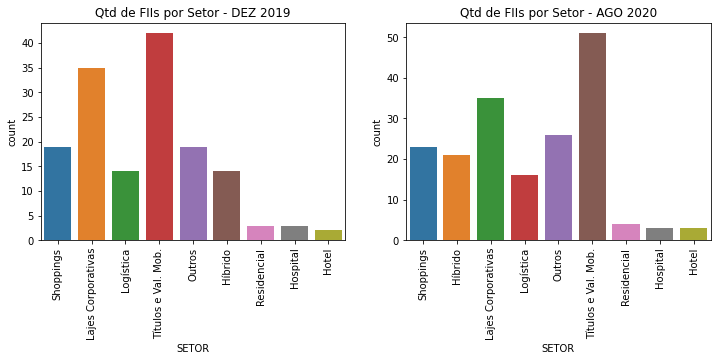

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df['SETOR'])
plt.xticks(rotation=90)
plt.title('Qtd de FIIs por Setor - DEZ 2019')

plt.subplot(1,2,2)
sns.countplot(data=df2,x=df2['SETOR'])
plt.xticks(rotation=90)
plt.title('Qtd de FIIs por Setor - AGO 2020')

plt.show()

Em geral em todos os setores dos FIIs houve aumento na quantidade dos fundos

In [191]:
results.iplot(kind='bar',x='SETOR',y='PROPORCAO(%)',colors='blue')

In [22]:
results=dfjoin.groupby('SETOR')['alvo'].value_counts(normalize=True).to_frame()*100
results.columns=['PROPORCAO(%)']
results.reset_index(inplace=True)
results

,SETOR,alvo,PROPORCAO(%)
0,Hospital,1,100.000000
1,Hotel,0,100.000000
2,Híbrido,0,78.571429
3,Híbrido,1,21.428571
4,Lajes Corporativas,0,85.714286
5,Lajes Corporativas,1,14.285714
6,Logística,0,57.142857
7,Logística,1,42.857143
8,Outros,0,73.684211
9,Outros,1,26.315789


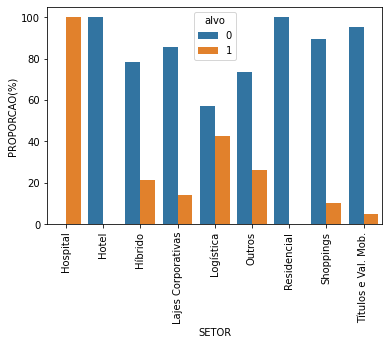

In [141]:
sns.barplot(data=results,x='SETOR',y='PROPORCAO(%)',hue="alvo")
plt.xticks(rotation=90)
plt.show()

In [177]:
px.bar(results,x='SETOR',y='PROPORCAO(%)',text='alvo',color='alvo',color_discrete_sequence =['green']*9)

Pelo gráfico acima temos que o setor hospitalar e o setor de logistica apresentam as maiores taxas dos FIIs que aumentaram os preços/rendimentos durante a pandemia

## Preço atual dos FIIs

In [24]:
px.box(dfjoin,x='alvo',y='PREÇO ATUAL_x',color='alvo')

retirando outiliers:

In [25]:
px.box(dfjoin[dfjoin['PREÇO ATUAL_x']<500],x='alvo',y='PREÇO ATUAL_x',color='alvo')

In [26]:
dfjoin.groupby('alvo')['PREÇO ATUAL_x'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,124.0,280.834113,600.114058,5.12,96.300,110.035,160.075,3554.88
1,26.0,282.540769,415.200585,1.23,113.975,134.445,196.300,1490.00


Pelos gráficos de caixa e pelas métricas acima temos que a mediana dos preços é mais elevada para o atributo alvo =1.

## Liquidez diária

In [27]:
px.box(dfjoin,x='alvo',y='LIQUIDEZ DIÁRIA',color='alvo')

retirando outiliers:

In [28]:
px.box(dfjoin[dfjoin['LIQUIDEZ DIÁRIA']<100000],x='alvo',y='LIQUIDEZ DIÁRIA',color='alvo')

In [29]:
dfjoin.groupby('alvo')['LIQUIDEZ DIÁRIA'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,124.0,15176.645161,28697.536645,1.0,623.75,3070.0,16316.75,216030.0
1,26.0,39966.500000,161598.306523,1.0,79.25,592.5,8796.75,828056.0


Pelos gráficos e descrição realizados acima tem-se menos liquidez para alvo=1 

<AxesSubplot:xlabel='LIQUIDEZ DIÁRIA', ylabel='Count'>

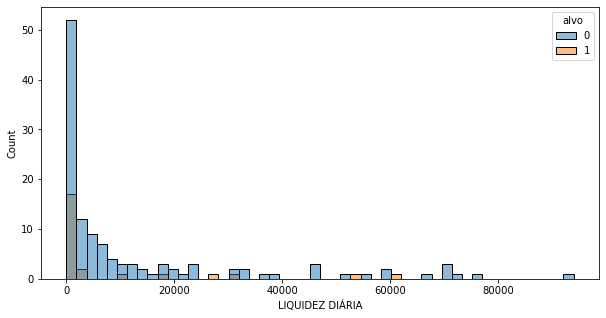

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfjoin[dfjoin['LIQUIDEZ DIÁRIA']<100000], x='LIQUIDEZ DIÁRIA',hue='alvo', bins=50)

In [31]:
import plotly.express as px
fig = px.box(dfjoin[dfjoin['LIQUIDEZ DIÁRIA']<100000],x='SETOR',y='LIQUIDEZ DIÁRIA',color='SETOR')
fig.show()

## Dividend Yield (12M) ACUMULADO

Como o dividendo é uma característica que pode variar muito ao longo do ano vamos analisar apenas apenas o Dividend Yield (12M) ACUMULADO e Dividend Yield (12M) MÉDIA

In [32]:
px.box(dfjoin,x='alvo',y='DY (12M) ACUMULADO',color='alvo')

In [33]:
dfjoin.groupby('alvo')['DY (12M) ACUMULADO'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,5.90624,3.995014,0.0,4.08,6.430,7.9800,18.63
1,26.0,5.55000,3.691050,0.0,2.78,7.125,8.2375,12.79


A mediana para atributo alvo =1 é pouco maior se comparado ao alvo=0

## Dividend Yield (12M) MÉDIA

In [34]:
px.box(dfjoin,x='alvo',y='DY(12M) MÉDIA',color='alvo')

In [35]:
dfjoin.groupby('alvo')['DY(12M) MÉDIA'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,0.492240,0.332643,0.0,0.34,0.540,0.6700,1.55
1,26.0,0.462692,0.308436,0.0,0.23,0.595,0.6875,1.07


A mediana para atributo alvo =1 é pouco maior se comparado ao alvo=0

## VARIAÇÕES DE PREÇO

Variação em percentual do valor do preço de fechamento de fechamento nos ultimos dois meses

In [36]:
dfjoin.head()

,CODIGO,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS,PREÇO ATUAL_y,RENTAB ACUMU_y,alvo
0,ABCP11,Shoppings,101.28,1906.0,0.49,0.48,1.52,2.89,5.83,0.51,0.48,0.49,5.31,7.07,7.59,23.42,9.107550e+08,74.63,1.36,0.66,0.13,0.79,436.66,0.9,NaN,1.0,89.90,-16.18,0
1,ALMI11,Lajes Corporativas,1575.00,109.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,1.905623e+08,1714.04,0.92,NaN,NaN,NaN,NaN,82.0,NaN,1.0,1210.99,-28.29,0
2,ALZR11,Logística,118.70,9601.0,0.55,0.48,1.37,2.84,6.90,0.46,0.47,0.57,5.54,5.83,6.34,22.69,2.707823e+08,94.65,1.25,0.58,0.03,0.61,2.62,0.0,NaN,6.0,125.80,-1.28,0
3,ATSA11,Shoppings,126.50,2.0,0.25,0.20,0.70,1.83,2.78,0.23,0.30,0.23,2.47,-6.11,-5.92,25.84,1.855730e+08,108.19,1.17,0.23,0.04,0.27,2.64,18.9,NaN,1.0,112.40,1.10,1
4,BARI11,Títulos e Val. Mob.,109.00,2415.0,0.83,0.75,2.75,0.00,0.00,0.92,0.00,0.00,6.10,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.12,-0.62,0.50,2.63,NaN,NaN,0.0,101.00,-4.66,0


In [37]:
px.box(dfjoin,x='alvo',y='VARIAÇÕES DE PREÇO',color='alvo')

retirando outiliers:

In [38]:
px.box(dfjoin[dfjoin['VARIAÇÕES DE PREÇO']>-40],x='alvo',y='VARIAÇÕES DE PREÇO',color='alvo')

In [39]:
dfjoin.groupby('alvo')['VARIAÇÕES DE PREÇO'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,2.328480,9.382553,-71.35,-0.7200,2.190,5.3900,34.00
1,26.0,3.296923,9.012674,-17.01,-0.7075,1.245,7.4175,24.61


Pelos gráficos e descrição realizados acima tem-se menos liquidez para alvo=1 

<AxesSubplot:xlabel='VARIAÇÕES DE PREÇO', ylabel='Count'>

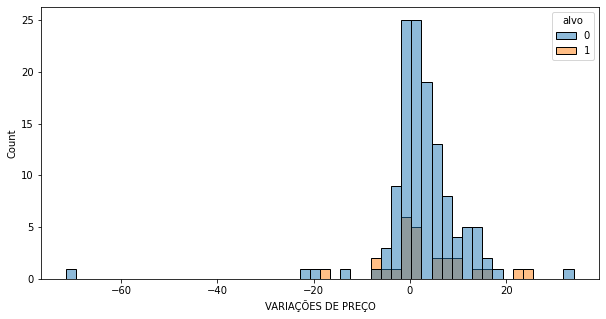

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfjoin, x='VARIAÇÕES DE PREÇO',hue='alvo', bins=50)

As distribuições estão bem próximas isso indica que esta variável não separa muito bem o atributo alvo

## RENTABILIDADE NO PERIODO

Retorno considerando o dividend yield e a variação da cota no ultimo mês

In [41]:
px.box(dfjoin,x='alvo',y='RENTA PERIODO',color='alvo')

retirando outiliers:

In [42]:
px.box(dfjoin[dfjoin['RENTA PERIODO']>-40],x='alvo',y='RENTA PERIODO',color='alvo')

In [43]:
dfjoin.groupby('alvo')['RENTA PERIODO'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,2.916080,9.486380,-71.35,0.0000,2.550,6.01,34.37
1,26.0,3.853462,9.220665,-16.66,-0.3075,1.755,8.08,25.41


Pelos gráficos e descrição esta varoável apresenta uma leve influencia no atributo alvo

In [44]:
dfjoin.head()

,CODIGO,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS,PREÇO ATUAL_y,RENTAB ACUMU_y,alvo
0,ABCP11,Shoppings,101.28,1906.0,0.49,0.48,1.52,2.89,5.83,0.51,0.48,0.49,5.31,7.07,7.59,23.42,9.107550e+08,74.63,1.36,0.66,0.13,0.79,436.66,0.9,NaN,1.0,89.90,-16.18,0
1,ALMI11,Lajes Corporativas,1575.00,109.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,1.905623e+08,1714.04,0.92,NaN,NaN,NaN,NaN,82.0,NaN,1.0,1210.99,-28.29,0
2,ALZR11,Logística,118.70,9601.0,0.55,0.48,1.37,2.84,6.90,0.46,0.47,0.57,5.54,5.83,6.34,22.69,2.707823e+08,94.65,1.25,0.58,0.03,0.61,2.62,0.0,NaN,6.0,125.80,-1.28,0
3,ATSA11,Shoppings,126.50,2.0,0.25,0.20,0.70,1.83,2.78,0.23,0.30,0.23,2.47,-6.11,-5.92,25.84,1.855730e+08,108.19,1.17,0.23,0.04,0.27,2.64,18.9,NaN,1.0,112.40,1.10,1
4,BARI11,Títulos e Val. Mob.,109.00,2415.0,0.83,0.75,2.75,0.00,0.00,0.92,0.00,0.00,6.10,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.12,-0.62,0.50,2.63,NaN,NaN,0.0,101.00,-4.66,0


## RENTAB ACUMULADA

Retorno calculado considerando o dividend yield e a varicção da cota desde o inicio do ao ate atual. 

In [45]:
px.box(dfjoin,x='alvo',y='RENTAB ACUMU_x',color='alvo')

In [46]:
dfjoin.groupby('alvo')['RENTAB ACUMU_x'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,15.155840,21.445312,-75.16,4.21,16.13,25.6600,113.24
1,26.0,14.476154,21.285136,-51.82,1.85,15.86,24.9875,61.65


<AxesSubplot:xlabel='RENTAB ACUMU_x', ylabel='Count'>

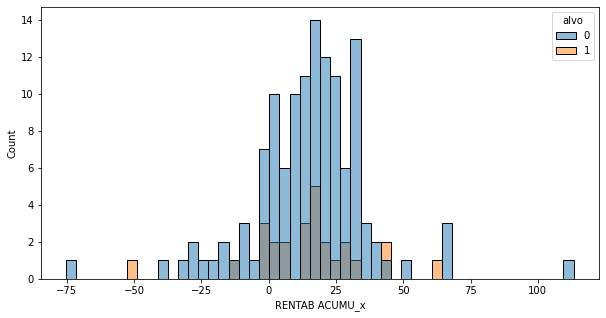

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfjoin, x='RENTAB ACUMU_x',hue='alvo', bins=50)

As distribuições estão bem próximas isso indica que esta variável não separa muito bem o atributo alvo

## PATRIMONIO LÍQUIDO

In [48]:
px.box(dfjoin,x='alvo',y='PATRI LIQ',color='alvo')

retirando outiliers:

In [49]:
px.box(dfjoin[dfjoin['PATRI LIQ']<1000000000],x='alvo',y='PATRI LIQ',color='alvo')

In [50]:
dfjoin.groupby('alvo')['PATRI LIQ'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,4.415769e+08,6.789321e+08,110007.73,1.098082e+08,2.199146e+08,4.312204e+08,4.088341e+09
1,26.0,2.542017e+08,2.745559e+08,43687800.08,8.890738e+07,1.779183e+08,2.858166e+08,1.232339e+09


Pelos gráficos e descrição realizados tem-se pouca diferenca para as medianas 

<AxesSubplot:xlabel='PATRI LIQ', ylabel='Count'>

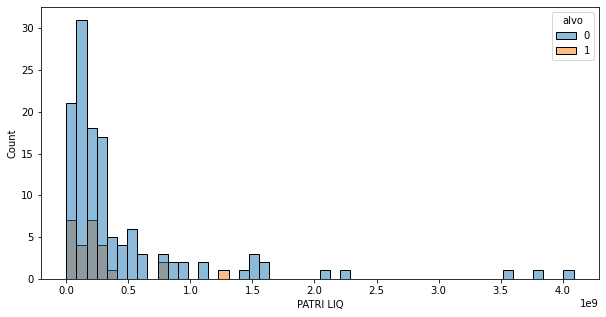

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfjoin, x='PATRI LIQ',hue='alvo', bins=50)

## VPA: VALOR PATRIMONIAL POR COTA

Valor do patrimonio líquido dividio pela quantidade de cotas do fundo

In [52]:
px.box(dfjoin,x='alvo',y='VPA',color='alvo')

retirando outiliers:

In [53]:
px.box(dfjoin[dfjoin['VPA']<500],x='alvo',y='VPA',color='alvo')

In [54]:
dfjoin[dfjoin['VPA']<500].groupby('alvo')['VPA'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,113.0,108.985398,60.802078,2.07,91.31,99.4,109.94,406.76
1,23.0,120.567391,73.364462,1.39,98.38,103.8,136.82,321.18


In [55]:
dfjoin.groupby('alvo')['VPA'].describe()

,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,266.313600,572.069633,2.07,92.880,100.770,127.8300,3377.53
1,26.0,246.126154,362.525145,1.39,99.855,108.475,184.0775,1331.18


Retirando alguns outliers tem-se que os quartis apresentam uma diferença significativa para o atributo alvo 

## P/VPA - PREÇO/VALOR PATRIMONIAL

In [56]:
px.box(dfjoin,x='alvo',y='P/VPA',color='alvo')

retirando outiliers:

In [57]:
px.box(dfjoin[dfjoin['P/VPA']<2],x='alvo',y='P/VPA',color='alvo')

In [58]:
dfjoin.groupby('alvo')['P/VPA'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,124.0,1.177097,0.886343,0.10,1.000,1.10,1.2625,10.62
1,26.0,1.177308,0.262458,0.59,1.065,1.19,1.3150,1.78


A distribuições apresentam uma leve diferença

## DY PATRIMONIAL

In [59]:
px.box(dfjoin,x='alvo',y='DY PATRIMONIAL',color='alvo')

retirando outiliers:

In [60]:
px.box(dfjoin[dfjoin['DY PATRIMONIAL']<2],x='alvo',y='DY PATRIMONIAL',color='alvo')

In [61]:
dfjoin.groupby('alvo')['DY PATRIMONIAL'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,112.0,0.670804,0.650916,0.05,0.4675,0.585,0.69,5.74
1,23.0,0.670000,0.253180,0.18,0.5500,0.710,0.86,1.02


## VARIAÇÃO PATRI

In [62]:
px.box(dfjoin,x='alvo',y='VARIAÇÃO PATRI',color='alvo')

retirando outiliers:

In [63]:
px.box(dfjoin[(dfjoin['VARIAÇÃO PATRI']<10) & (dfjoin['VARIAÇÃO PATRI']>-5)],x='alvo',y='VARIAÇÃO PATRI',color='alvo')

In [64]:
dfjoin.groupby('alvo')['VARIAÇÃO PATRI'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,112.0,0.945179,18.298119,-95.00,-0.085,0.04,0.575,166.06
1,23.0,-3.736522,18.821440,-90.04,-0.045,0.01,0.095,2.47


## RENTAB PATR PERIODO

In [65]:
px.box(dfjoin,x='alvo',y='RENTAB PATR PERIODO',color='alvo')

retirando outiliers:

In [66]:
px.box(dfjoin[(dfjoin['RENTAB PATR PERIODO']<10)& (dfjoin['RENTAB PATR PERIODO']>-10)],x='alvo',y='RENTAB PATR PERIODO',color='alvo')

In [67]:
dfjoin.groupby('alvo')['RENTAB PATR PERIODO'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,112.0,1.609375,18.293460,-94.96,0.450,0.63,1.1675,166.45
1,23.0,-3.103913,18.941944,-89.95,0.505,0.72,1.0050,3.21


## RENT PATRI ACUMU

In [68]:
px.box(dfjoin,x='alvo',y='RENT PATRI ACUMU',color='alvo')

retirando outiliers:

In [69]:
px.box(dfjoin[(dfjoin['RENT PATRI ACUMU']<100)&(dfjoin['RENT PATRI ACUMU']>-50)],x='alvo',y='RENT PATRI ACUMU',color='alvo')

In [70]:
dfjoin.groupby('alvo')['RENT PATRI ACUMU'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,112.0,22.865357,138.844539,-94.68,2.870,5.97,10.21,1406.15
1,23.0,5.565652,22.300773,-84.53,4.735,8.03,10.23,55.89


## VACANCIA FÍSICA

In [71]:
px.box(dfjoin,x='alvo',y='VAC FISICA',color='alvo')

In [72]:
dfjoin.groupby('alvo')['VAC FISICA'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,66.0,12.943788,20.628621,0.0,0.225,5.025,15.350,100.00
1,16.0,8.675625,13.645669,0.0,0.000,1.550,11.025,45.83


A vacancia apresentou uma boa influencia para o atributo alvo

## VACANCIA FINANCEIRA --Excluida por conter muitos dados faltantes

<AxesSubplot:xlabel='VAC FINANCEIRA', ylabel='Count'>

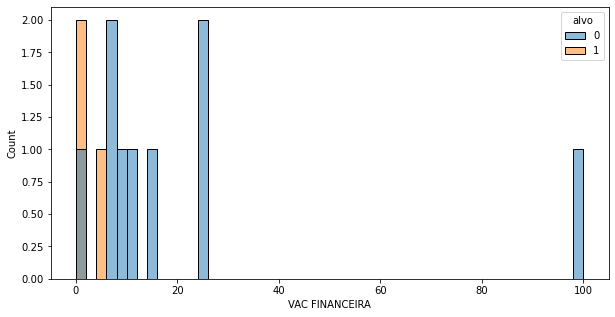

In [73]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfjoin, x='VAC FINANCEIRA',hue='alvo', bins=50)

In [74]:
dfjoin.groupby('alvo')['VAC FINANCEIRA'].describe()

,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,9.0,22.33,30.289748,1.48,7.3,10.9,25.7,100.0
1,3.0,1.60,2.771281,0.00,0.0,0.0,2.4,4.8


## QUANTIDADE DE ATIVOS

In [75]:
px.box(dfjoin,x='alvo',y='QUANTIDADE ATIVOS',color='alvo')

In [76]:
dfjoin.groupby('alvo')['QUANTIDADE ATIVOS'].describe()


,count,mean,std,min,25%,50%,75%,max
alvo,,,,,,,,
0,125.0,3.368000,8.100713,0.0,0.0,1.0,3.00,64.0
1,26.0,3.230769,5.616459,0.0,1.0,1.0,1.75,20.0


A quantidade de ativos não influencia o atributo alvo

In [77]:
import plotly.express as px
fig = px.box(df, x='SETOR', y="VAC FISICA")
fig.show()

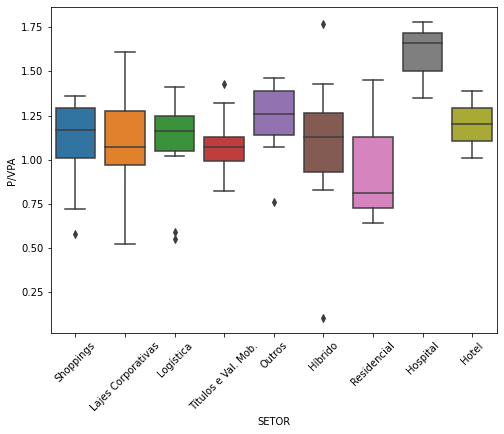

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[(df['P/VPA']<2) & (df['P/VPA']>0)],x='SETOR',y='P/VPA')
plt.xticks(rotation = 45)
plt.show()

In [79]:
plotar=df.groupby('SETOR')['VAC FISICA'].mean().sort_values(ascending=False).to_frame().reset_index()
plotar.columns=['setor','med_vacancia']

In [80]:
plotar.iplot(x='setor',y='med_vacancia',kind='bar',yTitle='med_vac',xTitle='setor')

In [81]:
potenciais=df[  (df['DY (12M) ACUMULADO']>5) & (df['LIQUIDEZ DIÁRIA']>10000)   &  (df['P/VPA']<1.1)  & (df['VAC FISICA']<20) & (df['QUANTIDADE ATIVOS']>2) ]
potenciais.sort_values('P/VPA')

,CODIGO,SETOR,PREÇO ATUAL,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY(3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY(3M) MÉDIA,DY(6M) MÉDIA,DY(12M) MÉDIA,DY ANO,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,VAC FINANCEIRA,QUANTIDADE ATIVOS
15,BRCR11,Híbrido,99.50,72167.0,0.55,0.59,1.58,2.87,15.18,0.53,0.48,1.26,14.78,2.19,2.79,-15.46,2.115619e+09,110.05,0.90,NaN,NaN,NaN,NaN,16.1,10.9,11.0
72,JSRE11,Híbrido,114.63,59006.0,0.53,0.47,1.52,3.18,6.42,0.51,0.53,0.54,5.87,2.07,2.55,17.07,1.509562e+09,109.03,1.05,0.52,-1.66,-1.15,3.35,0.0,NaN,3.0
80,MALL11,Shoppings,106.90,37128.0,0.34,0.32,1.27,2.99,6.52,0.42,0.50,0.54,5.93,5.04,5.37,6.83,7.689045e+08,101.70,1.05,0.15,166.06,166.45,96.78,1.0,NaN,4.0


# Escolhendo as variáveis

In [82]:
dfjoin.isnull().sum()

CODIGO                   0
SETOR                    0
PREÇO ATUAL_x            1
LIQUIDEZ DIÁRIA          1
DIVIDENDO                0
DIVIDEND YIELD           0
DY(3M) ACUMULADO         0
DY (6M) ACUMULADO        0
DY (12M) ACUMULADO       0
DY(3M) MÉDIA             0
DY(6M) MÉDIA             0
DY(12M) MÉDIA            0
DY ANO                   3
VARIAÇÕES DE PREÇO       0
RENTA PERIODO            0
RENTAB ACUMU_x           0
PATRI LIQ                0
VPA                      0
P/VPA                    1
DY PATRIMONIAL          16
VARIAÇÃO PATRI          16
RENTAB PATR PERIODO     16
RENT PATRI ACUMU        16
VAC FISICA              69
VAC FINANCEIRA         139
QUANTIDADE ATIVOS        0
PREÇO ATUAL_y           10
RENTAB ACUMU_y           9
alvo                     0
dtype: int64

In [83]:
dffinal=dfjoin[['SETOR','PREÇO ATUAL_x','LIQUIDEZ DIÁRIA','DY (12M) ACUMULADO','DY(12M) MÉDIA','VARIAÇÕES DE PREÇO','RENTA PERIODO','RENTAB ACUMU_x','PATRI LIQ','VPA','P/VPA','DY PATRIMONIAL','VARIAÇÃO PATRI','RENTAB PATR PERIODO','RENT PATRI ACUMU','VAC FISICA','QUANTIDADE ATIVOS','alvo']]

In [84]:
dffinal.isnull().sum()

SETOR                   0
PREÇO ATUAL_x           1
LIQUIDEZ DIÁRIA         1
DY (12M) ACUMULADO      0
DY(12M) MÉDIA           0
VARIAÇÕES DE PREÇO      0
RENTA PERIODO           0
RENTAB ACUMU_x          0
PATRI LIQ               0
VPA                     0
P/VPA                   1
DY PATRIMONIAL         16
VARIAÇÃO PATRI         16
RENTAB PATR PERIODO    16
RENT PATRI ACUMU       16
VAC FISICA             69
QUANTIDADE ATIVOS       0
alvo                    0
dtype: int64

# Tratamento de Dados

## Outliers

In [85]:
def remove_outliers_IQR(df, attributes, factor=2):
    """Funcao para remover outliers com base no IQR
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - factor: fator do IQR a considerar
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

In [86]:
dffinal.columns

Index(['SETOR', 'PREÇO ATUAL_x', 'LIQUIDEZ DIÁRIA', 'DY (12M) ACUMULADO',
       'DY(12M) MÉDIA', 'VARIAÇÕES DE PREÇO', 'RENTA PERIODO',
       'RENTAB ACUMU_x', 'PATRI LIQ', 'VPA', 'P/VPA', 'DY PATRIMONIAL',
       'VARIAÇÃO PATRI', 'RENTAB PATR PERIODO', 'RENT PATRI ACUMU',
       'VAC FISICA', 'QUANTIDADE ATIVOS', 'alvo'],
      dtype='object')

In [87]:
dffinal2=remove_outliers_IQR(dffinal,['PREÇO ATUAL_x', 'LIQUIDEZ DIÁRIA', 'DY (12M) ACUMULADO',
       'DY(12M) MÉDIA', 'VARIAÇÕES DE PREÇO', 'RENTA PERIODO',
       'RENTAB ACUMU_x', 'PATRI LIQ', 'VPA', 'P/VPA', 'DY PATRIMONIAL',
       'VARIAÇÃO PATRI', 'RENTAB PATR PERIODO', 'RENT PATRI ACUMU',
       'VAC FISICA', 'QUANTIDADE ATIVOS'])

<AxesSubplot:>

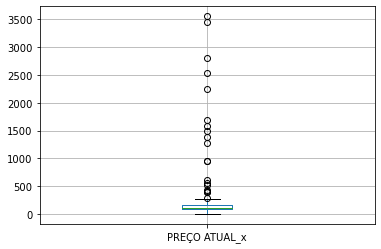

In [88]:
dffinal.boxplot(['PREÇO ATUAL_x'])

<AxesSubplot:>

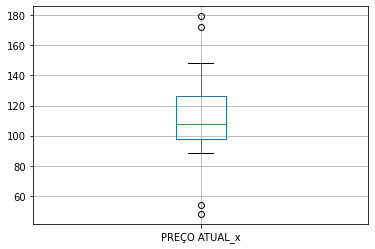

In [89]:
dffinal2.boxplot(['PREÇO ATUAL_x'])


In [90]:
dffinal2.shape

(27, 18)

Como retirando os outliers ficamos com muito pouco dado optou-se por deixa-los e tratar via normalização

## Dados faltantes

In [91]:
p=dffinal.isnull().sum().to_frame().reset_index()
p.columns=['setor','falta']
faltantes=p[p.falta!=0]['setor'].unique()
faltantes

array(['PREÇO ATUAL_x', 'LIQUIDEZ DIÁRIA', 'P/VPA', 'DY PATRIMONIAL',
       'VARIAÇÃO PATRI', 'RENTAB PATR PERIODO', 'RENT PATRI ACUMU',
       'VAC FISICA'], dtype=object)

Preencher dados faltantes pela média do setor:

In [92]:
for i in faltantes:
    dffinal[i] = dffinal.groupby(['SETOR'])[i]\
        .transform(lambda x: x.fillna(x.mean())) 
    

In [93]:
dffinal.isnull().sum()

SETOR                   0
PREÇO ATUAL_x           0
LIQUIDEZ DIÁRIA         0
DY (12M) ACUMULADO      0
DY(12M) MÉDIA           0
VARIAÇÕES DE PREÇO      0
RENTA PERIODO           0
RENTAB ACUMU_x          0
PATRI LIQ               0
VPA                     0
P/VPA                   0
DY PATRIMONIAL          0
VARIAÇÃO PATRI          0
RENTAB PATR PERIODO     0
RENT PATRI ACUMU        0
VAC FISICA             45
QUANTIDADE ATIVOS       0
alvo                    0
dtype: int64

In [94]:
dffinal[dffinal['VAC FISICA'].isnull()].head()

,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DY (12M) ACUMULADO,DY(12M) MÉDIA,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,QUANTIDADE ATIVOS,alvo
4,Títulos e Val. Mob.,109.00,2415.0,0.00,0.00,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.12,-0.62,0.50,2.63,NaN,0.0,0
9,Títulos e Val. Mob.,103.70,51091.0,7.31,0.61,13.65,14.23,30.59,1.104660e+09,87.09,1.19,0.61,-1.89,-1.30,10.33,NaN,0.0,0
10,Títulos e Val. Mob.,168.65,2722.0,8.96,0.75,9.27,10.93,65.74,2.199146e+08,130.16,1.30,0.77,4.11,4.91,15.53,NaN,0.0,0
11,Títulos e Val. Mob.,122.79,5814.0,8.44,0.70,3.49,3.99,19.18,1.838142e+08,106.25,1.16,0.60,2.29,2.90,13.17,NaN,0.0,0
14,Títulos e Val. Mob.,111.30,5352.0,8.12,0.68,2.47,3.25,24.10,2.681808e+08,100.49,1.11,0.65,3.33,4.00,11.81,NaN,0.0,0


Como a maior parte dos fundos que ainda apresetam dados faltantes para vacância são fundos de papel vamos preencher esses dados por 0:

In [95]:
dffinal.fillna(0,inplace=True)

In [96]:
dffinal.isnull().sum()

SETOR                  0
PREÇO ATUAL_x          0
LIQUIDEZ DIÁRIA        0
DY (12M) ACUMULADO     0
DY(12M) MÉDIA          0
VARIAÇÕES DE PREÇO     0
RENTA PERIODO          0
RENTAB ACUMU_x         0
PATRI LIQ              0
VPA                    0
P/VPA                  0
DY PATRIMONIAL         0
VARIAÇÃO PATRI         0
RENTAB PATR PERIODO    0
RENT PATRI ACUMU       0
VAC FISICA             0
QUANTIDADE ATIVOS      0
alvo                   0
dtype: int64

## Transformação de variaveis nominais em numericas

In [97]:
# armazena o nome das classes
classes = np.unique(dffinal['SETOR'])
data=dffinal['SETOR']
classes

array(['Hospital', 'Hotel', 'Híbrido', 'Lajes Corporativas', 'Logística',
       'Outros', 'Residencial', 'Shoppings', 'Títulos e Val. Mob.'],
      dtype=object)

In [98]:
number = 0 # valor que será usado para representar a clases
for i in classes:
    data = data.replace(i, number) # substitui cada valor da classe por number
    number = number + 1

dffinal['SETOR']=data

In [99]:
dffinal.head()

,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DY (12M) ACUMULADO,DY(12M) MÉDIA,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,QUANTIDADE ATIVOS,alvo
0,7,101.28,1906.0,5.83,0.49,7.07,7.59,23.42,9.107550e+08,74.63,1.36,0.660000,0.130000,0.790000,436.660000,0.9,1.0,0
1,3,1575.00,109.0,0.00,0.00,2.27,2.27,-28.29,1.905623e+08,1714.04,0.92,0.538065,-0.374516,0.162581,51.953871,82.0,1.0,0
2,4,118.70,9601.0,6.90,0.57,5.83,6.34,22.69,2.707823e+08,94.65,1.25,0.580000,0.030000,0.610000,2.620000,0.0,6.0,0
3,7,126.50,2.0,2.78,0.23,-6.11,-5.92,25.84,1.855730e+08,108.19,1.17,0.230000,0.040000,0.270000,2.640000,18.9,1.0,1
4,8,109.00,2415.0,0.00,0.00,-0.72,0.03,17.10,7.294868e+07,99.36,1.10,1.120000,-0.620000,0.500000,2.630000,0.0,0.0,0


## Normalização

Como existem muitos dados em escalas diferentes e outliers optou-se por fazer a normalização utilizando o RobustScaler que não é tão sensivel a outliers.

In [100]:
var=[x for x in dffinal.columns if x not in ['alvo'] ]
var

['SETOR',
 'PREÇO ATUAL_x',
 'LIQUIDEZ DIÁRIA',
 'DY (12M) ACUMULADO',
 'DY(12M) MÉDIA',
 'VARIAÇÕES DE PREÇO',
 'RENTA PERIODO',
 'RENTAB ACUMU_x',
 'PATRI LIQ',
 'VPA',
 'P/VPA',
 'DY PATRIMONIAL',
 'VARIAÇÃO PATRI',
 'RENTAB PATR PERIODO',
 'RENT PATRI ACUMU',
 'VAC FISICA',
 'QUANTIDADE ATIVOS']

In [101]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(dffinal[var])
transformer.transform(dffinal[var])

array([[ 4.00000000e-01, -1.82008807e-01, -2.69191748e-02, ...,
         5.59284785e+01,  6.54307525e-02,  0.00000000e+00],
       [-4.00000000e-01,  2.04193751e+01, -1.48461278e-01, ...,
         5.90167373e+00,  1.24471101e+01,  0.00000000e+00],
       [-2.00000000e-01,  6.15083526e-02,  4.93540751e-01, ...,
        -5.13654096e-01, -7.19738277e-02,  1.66666667e+00],
       ...,
       [-2.00000000e-01,  1.91514643e-01,  6.19573892e+00, ...,
        -2.75682705e-01,  5.38713195e-01,  3.00000000e+00],
       [ 4.00000000e-01,  1.35597959e-01,  7.32039229e+00, ...,
        -5.61768531e-01,  2.94438386e-01,  3.66666667e+00],
       [-4.00000000e-01, -1.43775774e+00,  1.15170781e+00, ...,
         5.90167373e+00,  1.51952017e+01,  0.00000000e+00]])

In [102]:
dffinal_norma=pd.DataFrame(transformer.transform(dffinal[var]),columns=var)


In [103]:
dffinal_norma

,SETOR,PREÇO ATUAL_x,LIQUIDEZ DIÁRIA,DY (12M) ACUMULADO,DY(12M) MÉDIA,VARIAÇÕES DE PREÇO,RENTA PERIODO,RENTAB ACUMU_x,PATRI LIQ,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRI,RENTAB PATR PERIODO,RENT PATRI ACUMU,VAC FISICA,QUANTIDADE ATIVOS
0,0.4,-0.182009,-0.026919,-0.134228,-0.114943,0.793478,0.788253,0.338968,2.431177,-0.701139,0.905660,0.260179,0.210526,0.213333,55.928479,0.065431,0.000000
1,-0.4,20.419375,-0.148461,-1.252157,-1.241379,0.048137,-0.034003,-2.023298,-0.037514,41.265071,-0.754717,-0.239428,-0.851613,-0.623226,5.901674,12.447110,0.000000
2,-0.2,0.061508,0.493541,0.070949,0.068966,0.600932,0.595054,0.305619,0.237466,-0.188660,0.490566,-0.067606,0.000000,-0.026667,-0.513654,-0.071974,1.666667
3,0.4,0.170546,-0.155698,-0.719080,-0.712644,-1.253106,-1.299845,0.449520,-0.054616,0.157942,0.188679,-1.501665,0.021053,-0.480000,-0.511053,2.813522,0.000000
4,0.6,-0.074090,0.007508,-1.252157,-1.241379,-0.416149,-0.380216,0.050251,-0.440672,-0.068092,-0.075472,2.144942,-1.368421,-0.173333,-0.512354,-0.071974,-0.333333
5,-0.4,37.529741,-0.133987,1.025887,1.034483,0.448758,0.508501,0.719050,0.679511,76.101625,-0.792453,0.956722,0.000000,0.306667,0.284785,5.819629,0.333333
6,-0.4,0.603900,1.097396,0.379674,0.390805,0.215839,0.239567,0.343536,4.903082,0.012543,1.584906,1.776184,-0.273684,0.400000,0.436931,-0.071974,21.000000
7,0.0,0.316069,-0.100169,0.320230,0.321839,-0.315217,-0.292117,-0.466880,-0.128581,0.028670,0.792453,1.202561,0.042105,0.413333,0.569571,0.000000,6.333333
8,-0.4,-0.728455,0.255732,-1.068073,-1.057471,2.683230,2.700155,-1.148926,-0.156338,-1.138871,-0.150943,-0.239428,-0.851613,-0.623226,5.901674,10.676118,0.000000
9,0.6,-0.148179,3.299763,0.149569,0.160920,1.815217,1.814529,0.666514,3.095850,-0.382184,0.264151,0.055314,-4.042105,-2.573333,0.488947,-0.071974,-0.333333


## Dados desbalenceados

sobreamostragem:

In [104]:
X=dffinal_norma[var]
y=dffinal.alvo

<AxesSubplot:>

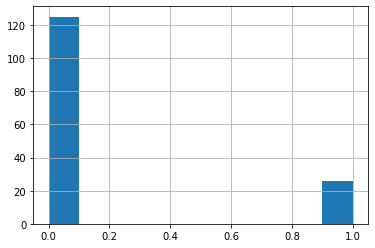

In [105]:
dffinal.alvo.hist()

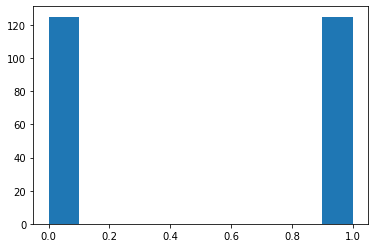

In [106]:
from imblearn import over_sampling
oversamp = over_sampling.SMOTE() # sampling_strategy pode ser usado para casos binários
Xo, Yo = oversamp.fit_resample(X, y)
h = plt.hist(Yo)

subamostragem

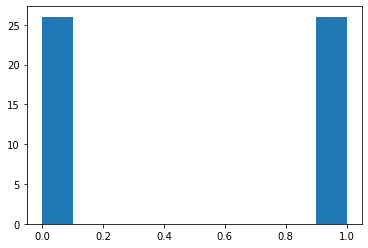

In [107]:
from imblearn import under_sampling
undersamp = under_sampling.RandomUnderSampler()
Xu, Yu = undersamp.fit_resample(X, y)

h = plt.hist(Yu)

Optou-se pela sobreamostragem utilizando a metodologia SMOTE caso contrário ficaríamos com poucas linhas de dados.

# Treinando os modelos

Separando dados de treino e teste:

In [108]:
from sklearn.model_selection import train_test_split
p = 0.2 
x_train, x_test, y_train, y_test = train_test_split(Xo, Yo, test_size = p, random_state = 2)

## Florestas Aleatórias

In [109]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.79      0.92      0.85        25

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50



In [111]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.84


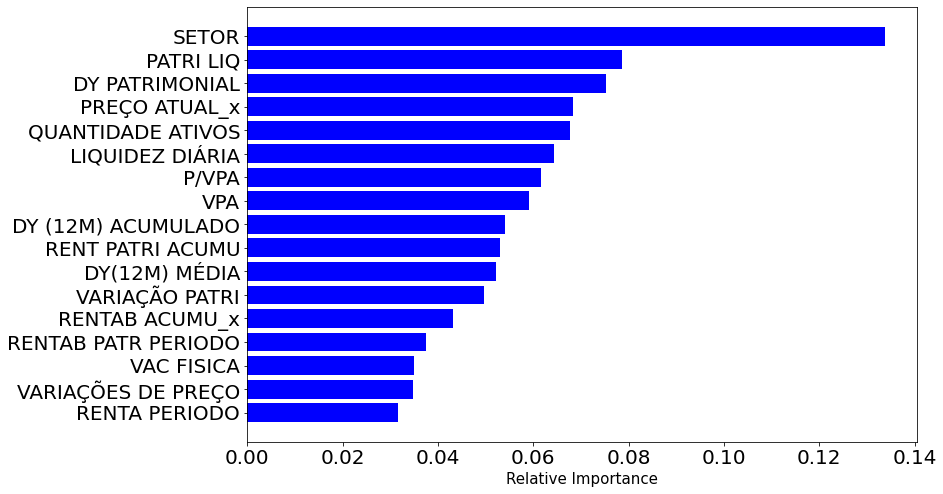

In [112]:
#features_names = dffinal.columns
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(var[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

## Regressão Logistica

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        25
           1       0.60      0.60      0.60        25

    accuracy                           0.60        50
   macro avg       0.60      0.60      0.60        50
weighted avg       0.60      0.60      0.60        50



Vamos utilizar o pacote statsmodels para identificar quais variaveis são mais relevantes para o atributo alvo

In [115]:
import statsmodels.api as sm
glm_binom = sm.GLM(Yo, Xo, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   alvo   No. Observations:                  250
Model:                            GLM   Df Residuals:                      233
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -140.06
Date:                Tue, 05 Oct 2021   Deviance:                       280.12
Time:                        20:46:45   Pearson chi2:                     236.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
SETOR                  -2.2617    

Nota: Pelo valor-p das variáveis nos resultados acima temos que apenas as variáveis SETOR,PREÇO ATUAL_x,PATRI LIQ,VPA,P/VPA,VAC FISICA apresentam P<0.05 ou próximo desse limite.

Assim vamos treinar o modelo novamente utilizando apenas as variáveis indicadas acima:

In [116]:
p = 0.2 
X_train, X_test, Y_train, Y_test = train_test_split(Xo[['SETOR','PREÇO ATUAL_x','PATRI LIQ','VPA','P/VPA','VAC FISICA']], Yo, test_size = p, random_state = 2)

In [117]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

In [118]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55        25
           1       0.57      0.64      0.60        25

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.58      0.58      0.58        50



## Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.20      0.30        25
           1       0.52      0.88      0.66        25

    accuracy                           0.54        50
   macro avg       0.57      0.54      0.48        50
weighted avg       0.57      0.54      0.48        50



## K-Vizinhos

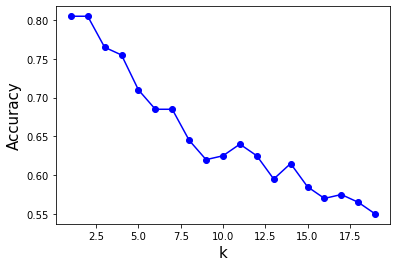

Melhor k: 2


In [121]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
k = 1 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.78      1.00      0.88        25

    accuracy                           0.86        50
   macro avg       0.89      0.86      0.86        50
weighted avg       0.89      0.86      0.86        50



## Regressão linerar  --> retirado devido a baixa correlação entre as variáveis

Para aplicarmos um modelo de regressão linear vamos adotar o 'RENTAB ACUMU_y' como atributo alvo, pois esta coluna é uma variável contínua e não mais discreta. 

In [124]:
df_reg=dfjoin[['SETOR','PREÇO ATUAL_x','LIQUIDEZ DIÁRIA','DY (12M) ACUMULADO','DY(12M) MÉDIA','VARIAÇÕES DE PREÇO','RENTA PERIODO','RENTAB ACUMU_x','PATRI LIQ','VPA','P/VPA','DY PATRIMONIAL','VARIAÇÃO PATRI','RENTAB PATR PERIODO','RENT PATRI ACUMU','VAC FISICA','QUANTIDADE ATIVOS','RENTAB ACUMU_y']]

Tratando dados faltantes

In [125]:
for i in faltantes:
    df_reg[i] = df_reg.groupby(['SETOR'])[i]\
        .transform(lambda x: x.fillna(x.mean())) 

In [126]:
df_reg.fillna(0,inplace=True)

Transformando variáveis nominais em numéricas

In [127]:
# armazena o nome das classes
classes2 = np.unique(df_reg['SETOR'])
data2=df_reg['SETOR']


number = 0 # valor que será usado para representar a clases
for i in classes2:
    data2 = data2.replace(i, number) # substitui cada valor da classe por number
    number = number + 1

df_reg['SETOR']=data

Normalizando

In [128]:
transformer = RobustScaler().fit(df_reg)
df_reg_norma=pd.DataFrame(transformer.transform(df_reg),columns=df_reg.columns)

Separando treino e teste

In [129]:
vars_reg=[i for i in df_reg_norma.columns if i.find('RENTAB ACUMU_y')==-1]
vars_reg

['SETOR',
 'PREÇO ATUAL_x',
 'LIQUIDEZ DIÁRIA',
 'DY (12M) ACUMULADO',
 'DY(12M) MÉDIA',
 'VARIAÇÕES DE PREÇO',
 'RENTA PERIODO',
 'RENTAB ACUMU_x',
 'PATRI LIQ',
 'VPA',
 'P/VPA',
 'DY PATRIMONIAL',
 'VARIAÇÃO PATRI',
 'RENTAB PATR PERIODO',
 'RENT PATRI ACUMU',
 'VAC FISICA',
 'QUANTIDADE ATIVOS']

Treinando o modelo

In [130]:
p = 0.2 
x_train, x_test, y_train, y_test = train_test_split(df_reg_norma[vars_reg], df_reg_norma['RENTAB ACUMU_y'], test_size = p, random_state = 2)

In [131]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

In [132]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: -0.2012459565414777


In [133]:
from sklearn.metrics import mean_squared_error

RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          

RSME: 0.5308864975998042


Analisando as variáveis

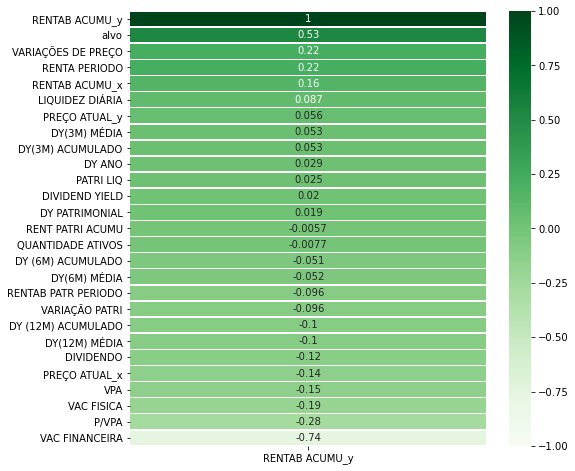

In [134]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(dfjoin.corr()[['RENTAB ACUMU_y']].sort_values(by='RENTAB ACUMU_y', ascending=False),linewidths=.5, vmin=-1, vmax=1, annot=True, cmap="Greens")
#heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Matriz de correlações de Pearson')

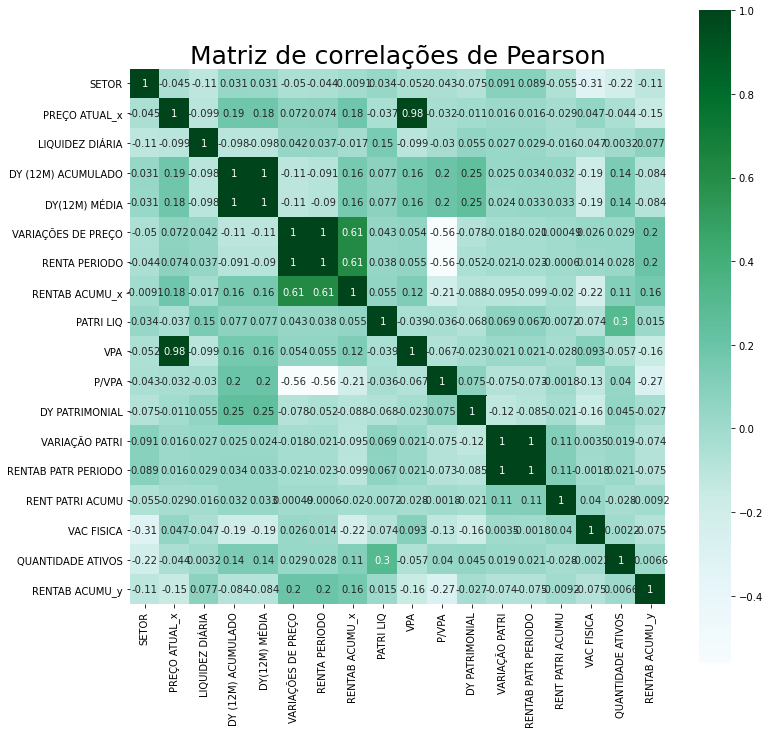

In [135]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_reg_norma.corr(),annot=True, square=True, cmap="BuGn")

plt.title('Matriz de correlações de Pearson',fontsize=25)

existe baixa correlação entre o atributo alvo e as variáveis

In [136]:
dfjoin.columns

Index(['CODIGO', 'SETOR', 'PREÇO ATUAL_x', 'LIQUIDEZ DIÁRIA', 'DIVIDENDO',
       'DIVIDEND YIELD', 'DY(3M) ACUMULADO', 'DY (6M) ACUMULADO',
       'DY (12M) ACUMULADO', 'DY(3M) MÉDIA', 'DY(6M) MÉDIA', 'DY(12M) MÉDIA',
       'DY ANO', 'VARIAÇÕES DE PREÇO', 'RENTA PERIODO', 'RENTAB ACUMU_x',
       'PATRI LIQ', 'VPA', 'P/VPA', 'DY PATRIMONIAL', 'VARIAÇÃO PATRI',
       'RENTAB PATR PERIODO', 'RENT PATRI ACUMU', 'VAC FISICA',
       'VAC FINANCEIRA', 'QUANTIDADE ATIVOS', 'PREÇO ATUAL_y',
       'RENTAB ACUMU_y', 'alvo'],
      dtype='object')

In [137]:
df_reg=dfjoin[['PREÇO ATUAL_x', 'LIQUIDEZ DIÁRIA', 'DIVIDENDO',
       'DIVIDEND YIELD', 'DY(3M) ACUMULADO', 'DY (6M) ACUMULADO',
       'DY (12M) ACUMULADO', 'DY(3M) MÉDIA', 'DY(6M) MÉDIA', 'DY(12M) MÉDIA',
       'DY ANO', 'VARIAÇÕES DE PREÇO', 'RENTA PERIODO', 'RENTAB ACUMU_x',
       'PATRI LIQ', 'VPA', 'P/VPA', 'DY PATRIMONIAL', 'VARIAÇÃO PATRI',
       'RENTAB PATR PERIODO', 'RENT PATRI ACUMU', 'VAC FISICA',
       'VAC FINANCEIRA', 'QUANTIDADE ATIVOS','RENTAB ACUMU_y',]]

<ipython-input-138-15a5fd6c5bfb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



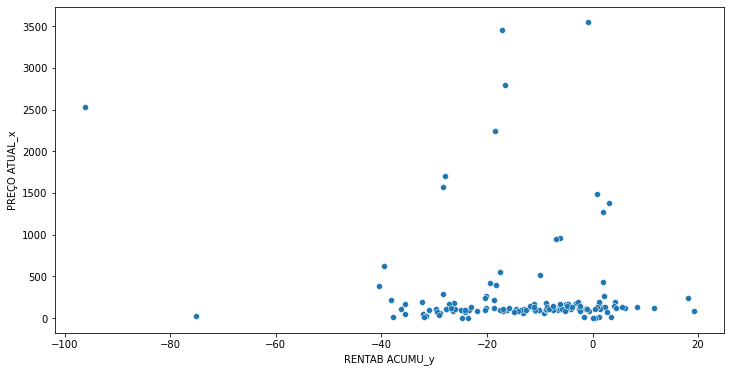

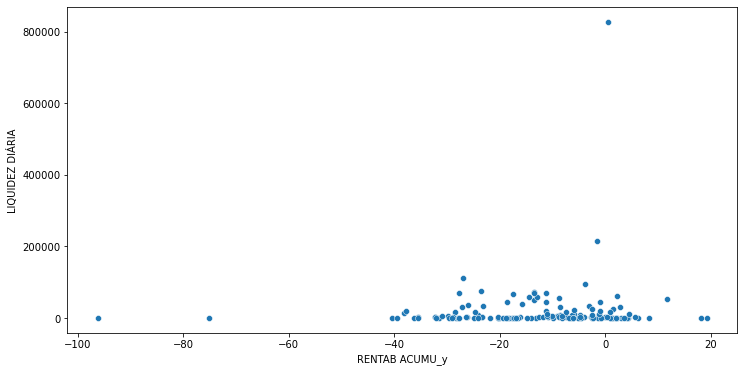

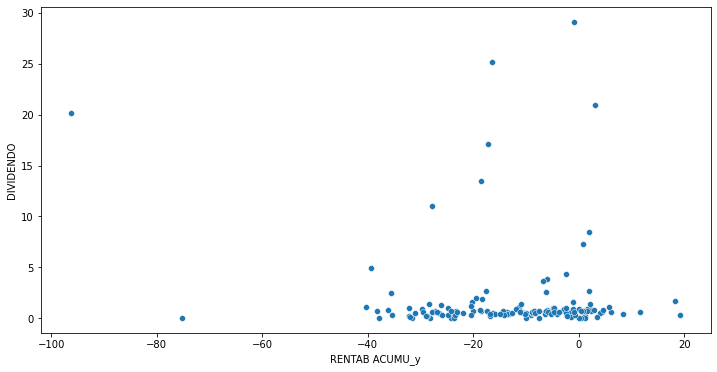

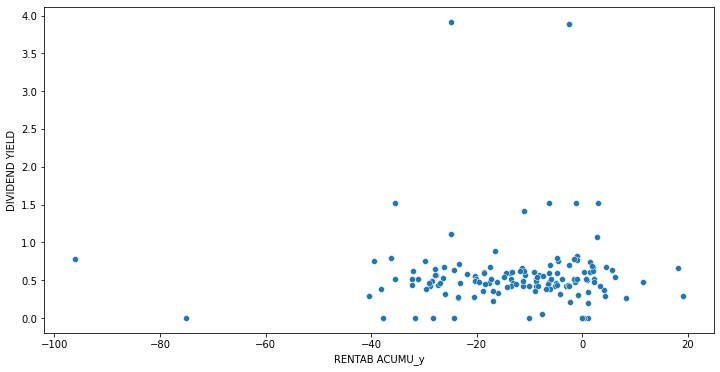

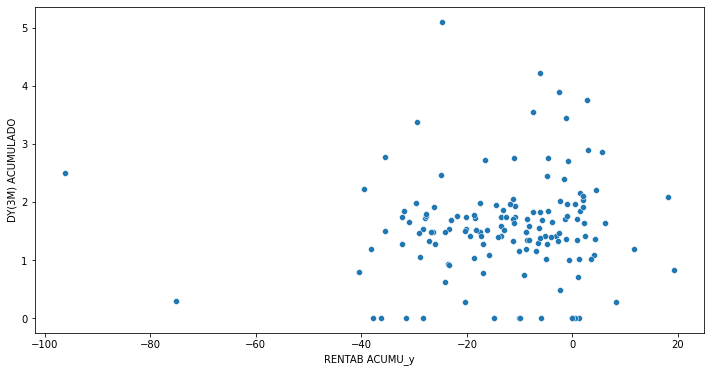

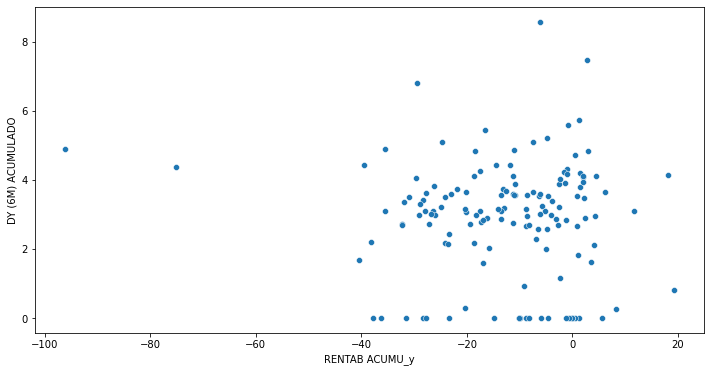

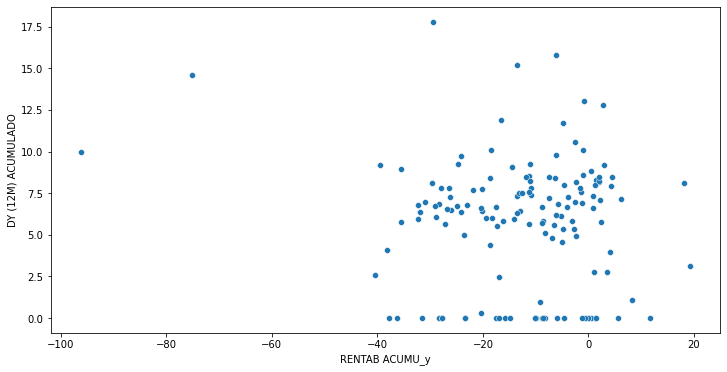

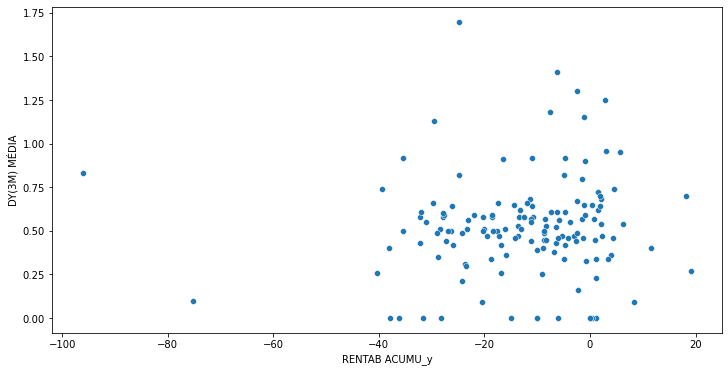

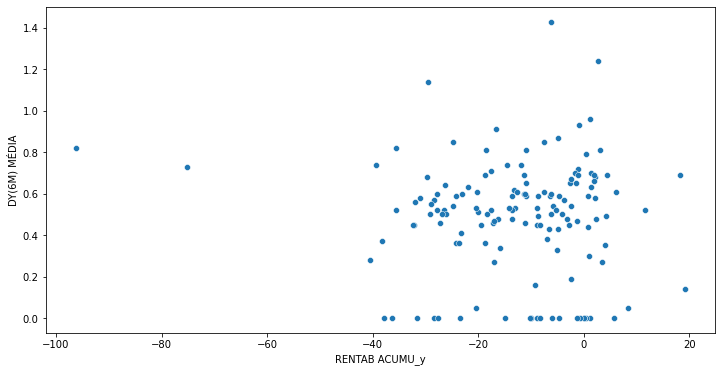

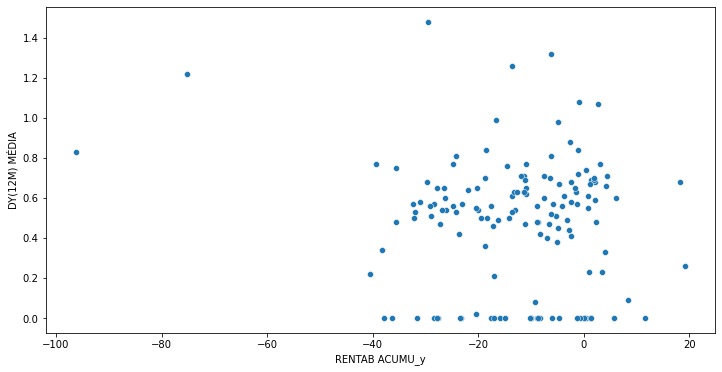

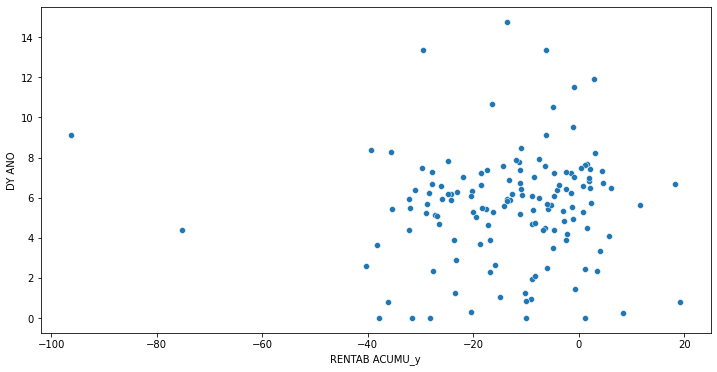

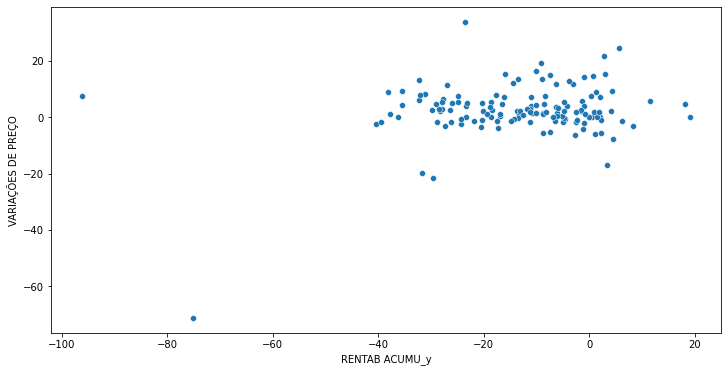

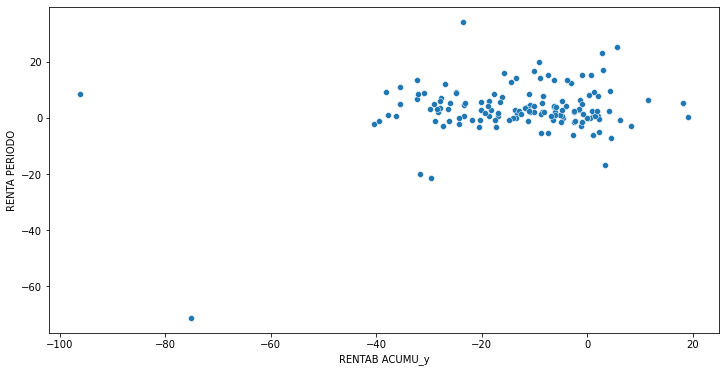

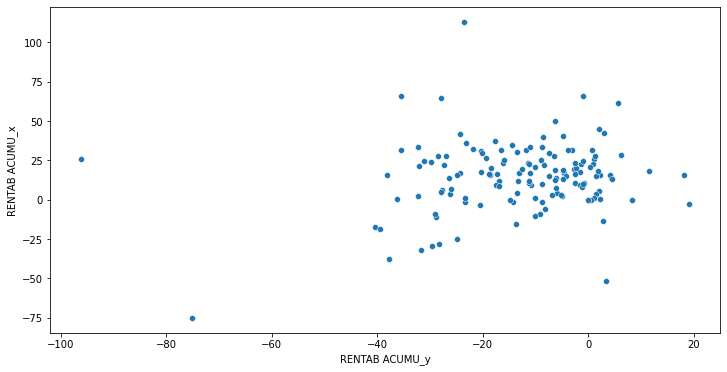

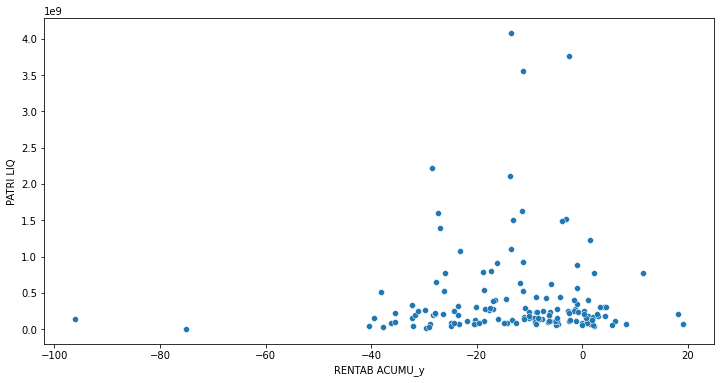

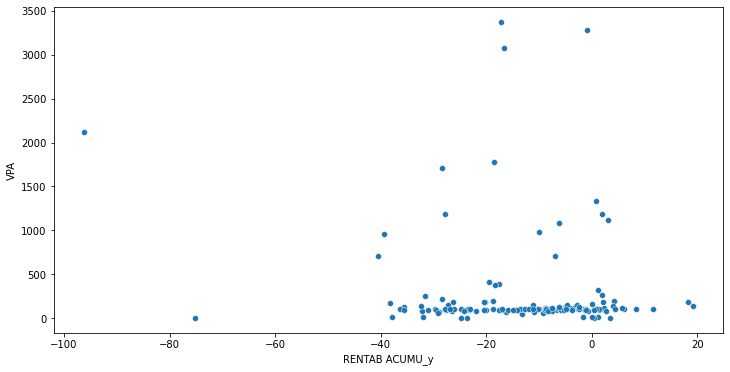

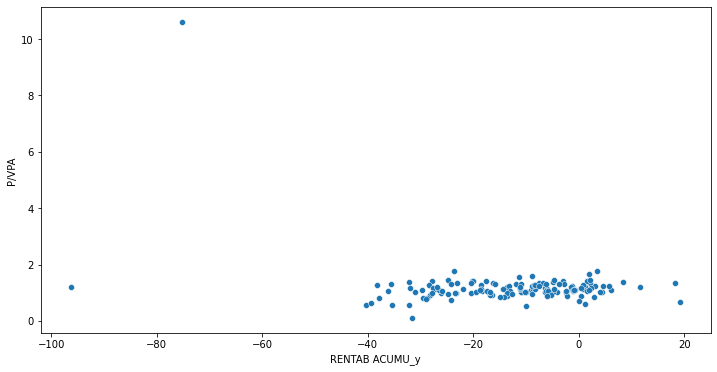

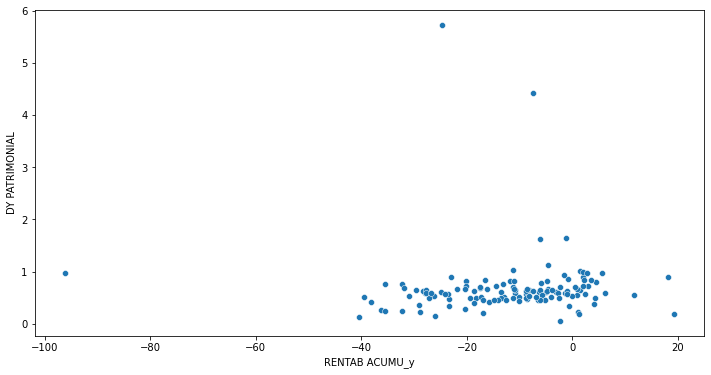

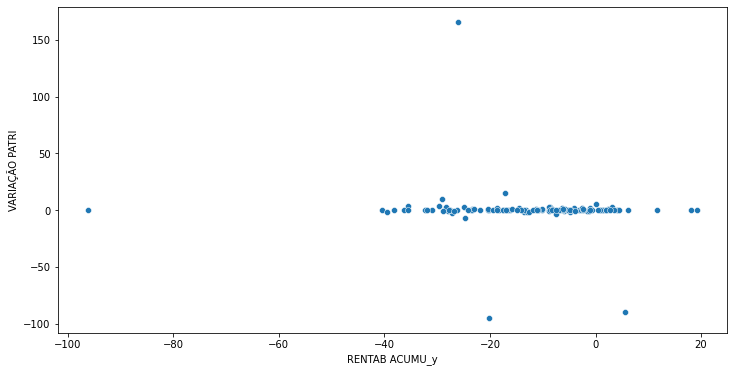

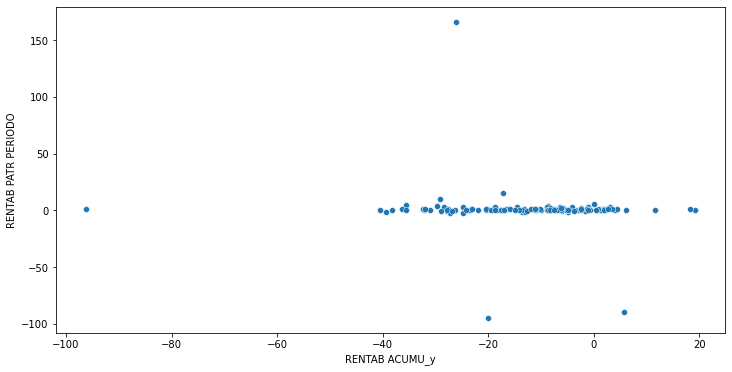

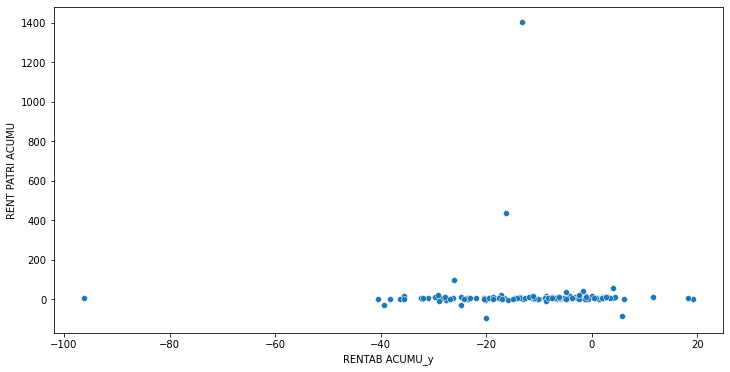

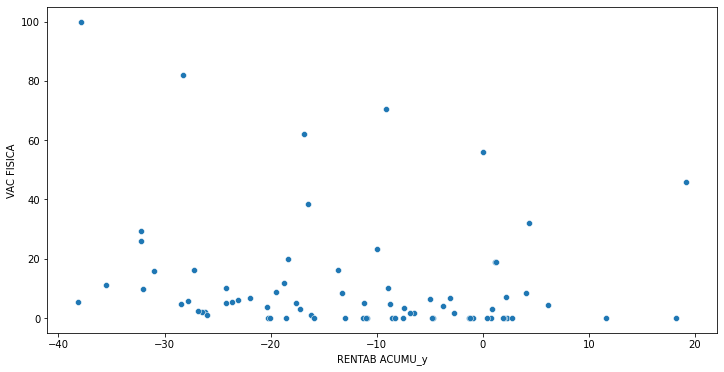

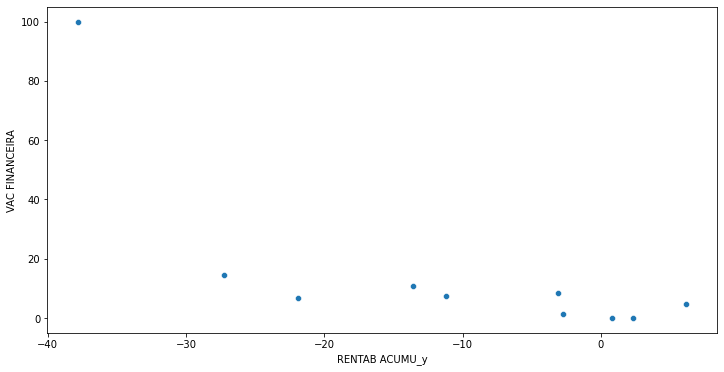

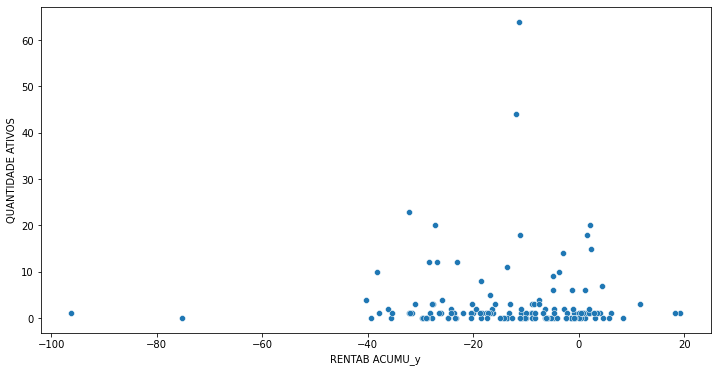

In [138]:

for i in df_reg.columns:
    if i.find('RENTAB ACUMU_y')==-1:
        plt.figure(figsize=(12,6))
        sns.scatterplot(data=df_reg, x='RENTAB ACUMU_y', y=i)


Pelas análises acima tem-se que as variáveis não apresentam uma correlação significativa com o atributo alvo 'RENTAB ACUMU_y' isso justifica o fraco desempenho da modelagem por regressão linear multipla. Assim optou-se em resolver este trabalho utilizando classificação.